In [56]:
%matplotlib inline
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from proteus.visu import matrix as visu
from proteus.matrix import tseries as ts
import nibabel as nib
from nibabel.affines import apply_affine
import pandas as pd
from sklearn.cross_validation import KFold

In [3]:
subj_id='HC0040123'

In [10]:
vol_nii = nib.load('/home/cdansereau/data/cobre/'+subj_id+'/rest/rest.nii.gz')
vol_nii.shape

(64, 64, 33, 150)

In [7]:
covar = pd.read_csv('/home/cdansereau/data/cobre/resample/fmri_'+subj_id+'_session1_run1_n_confounds.tsv.gz',sep='\t')
covar.columns

Index([u'motion_tx', u'motion_ty', u'motion_tz', u'motion_rx', u'motion_ry',
       u'motion_rz', u'FD', u'scrub', u'slow_drift', u'slow_drift.1',
       u'slow_drift.2', u'slow_drift.3', u'slow_drift.4', u'slow_drift.5',
       u'wm_avg', u'vent_avg', u'global_signal_pca', u'compcor', u'compcor.1',
       u'compcor.2', u'compcor.3', u'compcor.4'],
      dtype='object')

In [22]:
Xmotion = covar.iloc[:,0:6]
Xdrift  = covar.iloc[:,8:14]

,slow_drift,slow_drift.1,slow_drift.2,slow_drift.3,slow_drift.4,slow_drift.5
0,1.400157,1.409492,1.400157,1.409492,1.400157,1.409492
1,1.399848,1.408255,1.397376,1.404548,1.392436,1.398377
2,1.398921,1.404548,1.389042,1.389753,1.369355,1.365210
3,1.397376,1.398377,1.375190,1.365210,1.331169,1.310512
4,1.395214,1.389753,1.355873,1.331091,1.278295,1.235147
5,1.392436,1.378691,1.331169,1.287635,1.211313,1.140303
6,1.389042,1.365210,1.301173,1.235147,1.130956,1.027475
7,1.385036,1.349334,1.266006,1.173995,1.038106,0.898444
8,1.380418,1.331091,1.225805,1.104609,0.933779,0.755243
9,1.375190,1.310512,1.180729,1.027475,0.819118,0.600132


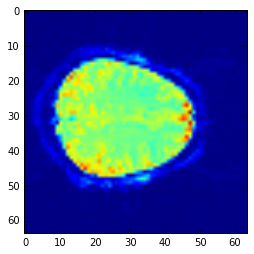

In [9]:
plt.imshow(vol_nii.get_data()[:,:,20,10])

# Extract mask

In [43]:
def getR2(y,ypred):
    R2 = 1. - np.sum((y-ypred)**2,0)/np.sum(y**2,0)
    return R2 

def getMap(val,mask):
    new_map = np.zeros_like(mask).astype(float)
    new_map[mask] = val
    return new_map

mask = vol.mean(3)>550


# Linear regression

0.332876297499


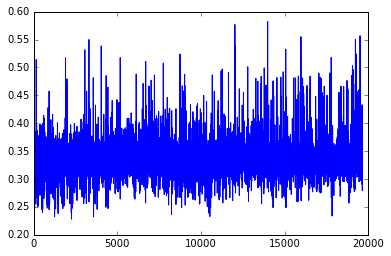

In [51]:
from sklearn.linear_model import LinearRegression
X = Xmotion
y = vol[mask].T

lreg = LinearRegression(fit_intercept=False)
lreg.fit(X,y)

ypred = lreg.predict(X)
R2 = getR2(y,ypred)

plt.plot(R2)

print R2.mean()

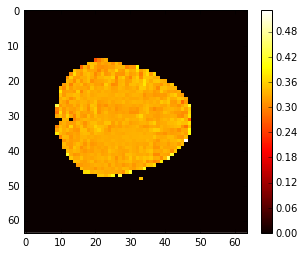

In [52]:
visu.mat(getMap(R2,mask)[:,:,20])

In [116]:

kf = KFold(n=150, n_folds=10, shuffle=False,random_state=None)

pred_vals = []
ref_vals = []
for train, test in kf:
    #print train
    ts = vol[mask].T
    ## Train
    lreg_d = LinearRegression(fit_intercept=True)
    lreg_d.fit(Xdrift.values[train,:],ts[train,:])
    new_ts = ts[train,:]-lreg_d.predict(Xdrift.values[train,:])
    
    lreg_md = LinearRegression(fit_intercept=True)
    lreg_md.fit(Xdrift.values[train,:],Xmotion.values[train,:])
    
    # Learn the regression parameters to predict time series
    lreg_m = LinearRegression(fit_intercept=False)
    lreg_m.fit(Xmotion.values[train,:],new_ts)
    
    ## Test on independent data
    X_test = Xmotion.values[test,:] - lreg_md.predict(Xdrift.values[test,:])
    pred_vals.append(lreg_m.predict(X_test))
    
    ref_vals.append(ts[test,:] - lreg_d.predict(Xdrift.values[test,:]))
    
    
    
print getR2(np.vstack(ref_vals),np.vstack(pred_vals)).mean()


0.129828844347


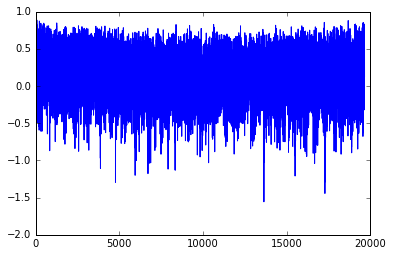

In [117]:
plt.plot(getR2(np.vstack(ref_vals),np.vstack(pred_vals)))

-1.5563431622 0.885534125506


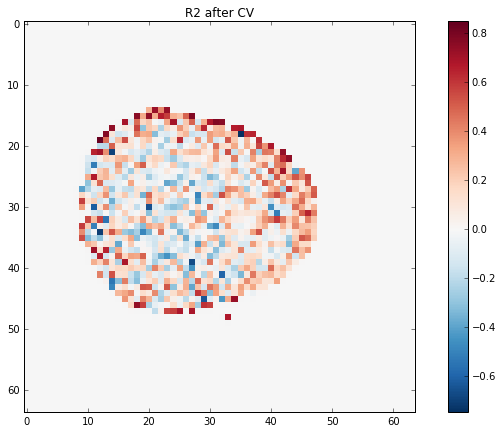

In [118]:
R2 = getR2(np.vstack(ref_vals),np.vstack(pred_vals))
plt.figure(figsize=(15,7))
plt.title('R2 after CV')
print R2.min(),R2.max()
visu.mat(getMap(R2,mask)[:,:,20])

-1.5563431621993939